# Данные для регрессии

Ссылка на датасет: https://www.kaggle.com/datasets/mnassrib/dow-jones-industrial-average/

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
regression_data = pd.read_csv('drive/MyDrive/Датасеты/Dow Jones Industrial Average Historical Data.csv')

In [ ]:
regression_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2761,"Jan 09, 2009","8,599.18","8,738.80","8,800.45","8,541.75",-,-1.64%
2762,"Jan 08, 2009","8,742.46","8,769.94","8,807.14","8,593.52",-,-0.31%
2763,"Jan 07, 2009","8,769.70","8,996.94","8,996.94","8,690.45",-,-2.72%
2764,"Jan 06, 2009","9,015.10","8,954.57","9,175.19","8,868.07",-,0.69%
2765,"Jan 05, 2009","8,952.89","9,027.13","9,093.47","8,841.70",-,-0.91%


In [ ]:
open = list(regression_data['Open'])
open = list(map(lambda x: ''.join(list(filter(lambda ch: ch != ',', list(x)))), open))
open = pd.Series(list(map(lambda x: round(float(x), 3), open)))
regression_data['Open'] = open

In [ ]:
price = list(regression_data['Price'])
price = list(map(lambda x: ''.join(list(filter(lambda ch: ch != ',', list(x)))), price))
price = pd.Series(list(map(lambda x: round(float(x), 3), price)))
regression_data['Price'] = price

In [ ]:
high = list(regression_data['High'])
high = list(map(lambda x: ''.join(list(filter(lambda ch: ch != ',', list(x)))), high))
high = pd.Series(list(map(lambda x: round(float(x), 3), high)))
regression_data['High'] = high

In [ ]:
low = list(regression_data['Low'])
low = list(map(lambda x: ''.join(list(filter(lambda ch: ch != ',', list(x)))), low))
low = pd.Series(list(map(float, low)))
regression_data['Low'] = low

In [ ]:
regression_data['Difference'] = regression_data['High'] - regression_data['Low']

In [ ]:
# regression_data = regression_data.sort_values(by='Difference')

Найдём дисперсию и стандартное отклонение столбца Difference и определим выбросы

In [ ]:
print(round(regression_data.Difference.var(), 3))

14586.251


In [ ]:
print(round(sigma := regression_data.Difference.std(), 3))

120.774


BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x78e9c0bd5840>, <matplotlib.lines.Line2D object at 0x78e9c0bd4ca0>], 'caps': [<matplotlib.lines.Line2D object at 0x78e9c0bd4520>, <matplotlib.lines.Line2D object at 0x78e9c0bd41f0>], 'boxes': [<matplotlib.lines.Line2D object at 0x78e9c0bd5510>], 'medians': [<matplotlib.lines.Line2D object at 0x78e9c0bd48b0>], 'fliers': [<matplotlib.lines.Line2D object at 0x78e9c0bd7ac0>], 'means': []})

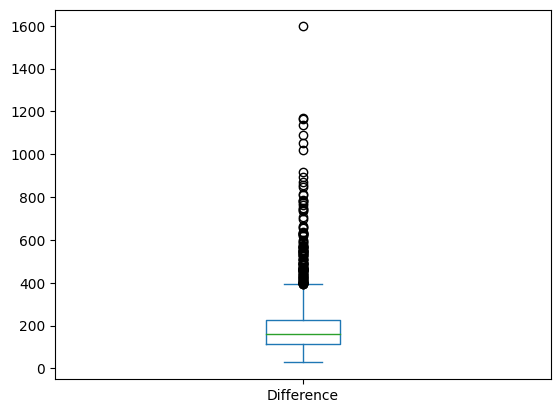

In [ ]:
regression_data.Difference.plot.box(return_type='both')

In [ ]:
upper_bound = regression_data.Difference.mean() + 2 * sigma # regression_data.Difference.quantile(q=0.75)
lower_bound = regression_data.Difference.mean() - 2 * sigma # regression_data.Difference.quantile(q=0.25)
regression_data['ID'] = regression_data.index
anomalies_ids = list(regression_data[
    (regression_data.Difference < lower_bound) | (regression_data.Difference > upper_bound) ].index)

In [ ]:
anomalies = regression_data[
    (regression_data.Difference < lower_bound) | (regression_data.Difference > upper_bound) ]
regression_data_2 = regression_data[
    (regression_data.Difference >= lower_bound) & (regression_data.Difference <= upper_bound) ]

In [ ]:
anomaly_high = list(anomalies.High)
high = [[h, h in anomaly_high] for h in list(regression_data.High)]

anomaly_low = list(anomalies.Low)
low = [[h, h in anomaly_low] for h in list(regression_data.Low)]

anomaly_difference = list(anomalies.Difference)
difference = [[h, h in anomaly_difference] for h in list(regression_data.Difference)]

In [ ]:
anomalies.head()

,Date,Price,Open,High,Low,Vol.,Change %,Difference,ID
61,"Oct 03, 2019",26201.04,26039.02,26205.20,25743.46,249.02M,0.47%,461.74,61
62,"Oct 02, 2019",26078.62,26425.86,26438.04,25974.12,312.73M,-1.86%,463.92,62
63,"Oct 01, 2019",26573.04,26962.54,27046.21,26562.22,272.18M,-1.28%,483.99,63
89,"Aug 23, 2019",25628.90,26134.21,26320.29,25507.18,364.26M,-2.37%,813.11,89
96,"Aug 14, 2019",25479.42,26035.08,26035.08,25471.59,357.00M,-3.05%,563.49,96


In [ ]:
# Аппроксимация выбросов
cnt = 0
for i in range(1, len(high) - 1):
  if difference[i][1]:
    high[i][0] = (high[i - 1][0] + high[i + 1][0]) / 2
    low[i][0] = (low[i - 1][0] + low[i + 1][0]) / 2
    # print(f'{difference[i][0]} -> ', end='')
    difference[i][0] = high[i][0] - low[i][0]
    # print(difference[i][0])
    cnt += 1
print(cnt)

101


In [ ]:
high = list(map(lambda p: p[0], high))
low = list(map(lambda p: p[0], low))
difference = list(map(lambda p: p[0], difference))

regression_data_1 = regression_data.copy()
regression_data_1['High'] = pd.Series(high)
regression_data['Low'] = pd.Series(low)
regression_data['Difference'] = pd.Series(difference)

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x78e9c0b23a90>, <matplotlib.lines.Line2D object at 0x78e9c0b23fa0>], 'caps': [<matplotlib.lines.Line2D object at 0x78e9c0b23fd0>, <matplotlib.lines.Line2D object at 0x78e9c0b227a0>], 'boxes': [<matplotlib.lines.Line2D object at 0x78e9b767b6a0>], 'medians': [<matplotlib.lines.Line2D object at 0x78e9c0b20790>], 'fliers': [<matplotlib.lines.Line2D object at 0x78e9c0b209d0>], 'means': []})

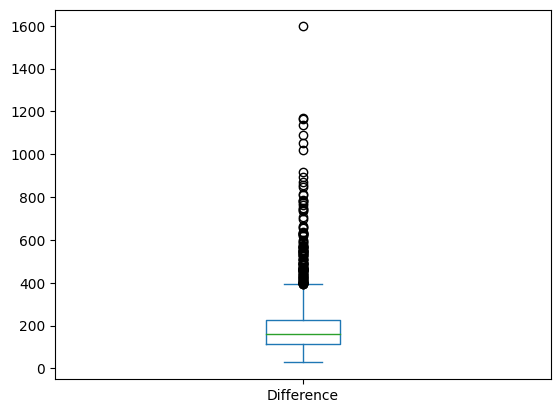

In [ ]:
regression_data_1.Difference.plot.box(return_type='both')

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x78e9c1202c50>, <matplotlib.lines.Line2D object at 0x78e9c1202dd0>], 'caps': [<matplotlib.lines.Line2D object at 0x78e9c1203070>, <matplotlib.lines.Line2D object at 0x78e9c1203310>], 'boxes': [<matplotlib.lines.Line2D object at 0x78e9c1202ad0>], 'medians': [<matplotlib.lines.Line2D object at 0x78e9c12035b0>], 'fliers': [<matplotlib.lines.Line2D object at 0x78e9c1203850>], 'means': []})

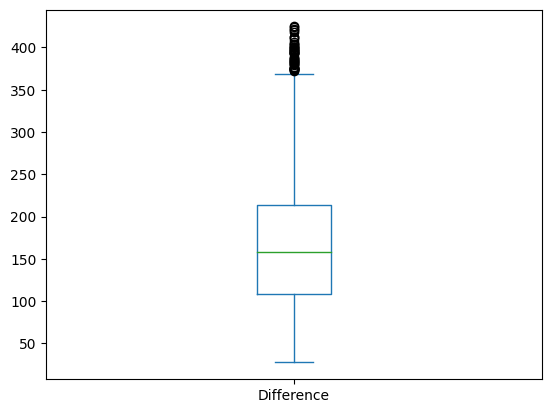

In [ ]:
regression_data_2.Difference.plot.box(return_type='both')

# Данные для кластеризации

Ссылка на данные: https://data.world/data-society/air-traffic-passenger-data

In [ ]:
clustering_data = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [ ]:
clustering_data.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March
15006,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,10898,Enplaned,10898,2016,March


<Axes: >

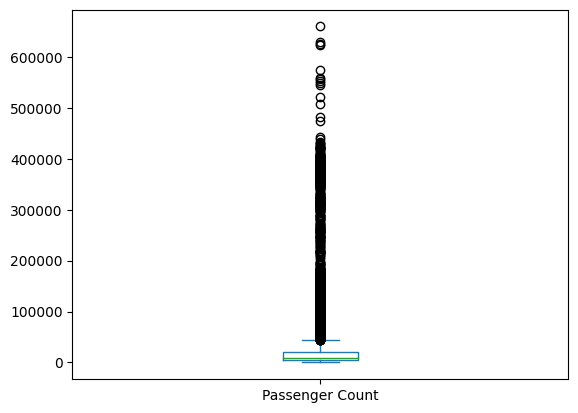

In [ ]:
clustering_data['Passenger Count'].plot.box()